# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 12

## Problem 1a

We can look at the data from within this notebook in the same way we did for Chapter 11.  Let's dispense with the preliminaries:  

In [1]:
# import PmagPy functions
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag 
import numpy as np # while we are at it, let's import numpy
import matplotlib.pyplot as plt # set up for plotting 
%matplotlib inline



and get to it using  **ipmag.plot_net()** with **ipmag.plot_di( )**.  

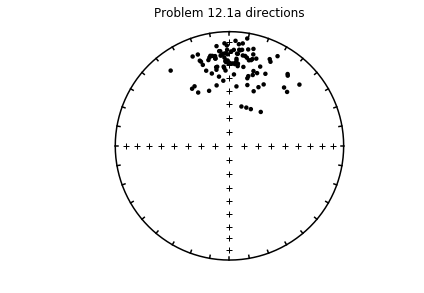

In [2]:
data=np.loadtxt('Chapter_12/ps12-1a.di')# read in data
ipmag.plot_net(1) # plot the equal area net
ipmag.plot_di(di_block=data,title="Problem 12.1a directions") # put on the directions


This looks Fisherian to me!  See how the data are pretty much symmetrical about the mean direction?  But let's check with either **ipmag.fishqq( )**.

In [3]:
help(ipmag.fishqq)

Help on function fishqq in module pmagpy.ipmag:

fishqq(lon=None, lat=None, di_block=None)
    Test whether a distribution is Fisherian and make a corresponding Q-Q plot.
    The Q-Q plot shows the data plotted against the value expected from a
    Fisher distribution. The first plot is the uniform plot which is the
    Fisher model distribution in terms of longitude (declination). The second
    plot is the exponential plot which is the Fisher model distribution in terms
    of latitude (inclination). In addition to the plots, the test statistics Mu
    (uniform) and Me (exponential) are calculated and compared against the
    critical test values. If Mu or Me are too large in comparision to the test
    statistics, the hypothesis that the distribution is Fisherian is rejected
    (see Fisher et al., 1987).
    
    Parameters:
    -----------
    lon : longitude or declination of the data
    lat : latitude or inclination of the data
        or
    di_block: a nested list of [dec,inc

{'Dec': 3.2952175510041122,
 'Inc': 27.616634753104599,
 'Me': 0.98280311722089397,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': -0.64590123625229034,
 'Mu_critical': 1.207,
 'N': 100,
 'Test_result': 'consistent with Fisherian model'}

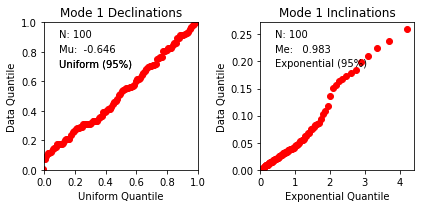

In [5]:
ipmag.fishqq(di_block=data) # use data read in problem 1a.

And it looks like at the 95% confidence level, this data set IS Fisherian.

## Problem 1b

Now let's try the other data set.

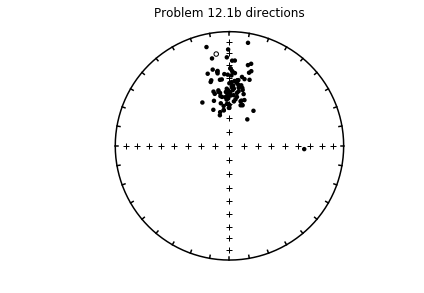

In [10]:
data=np.loadtxt('Chapter_12/ps12-1b.di')# read in data
ipmag.plot_net(1) # plot the equal area net
ipmag.plot_di(di_block=data,title="Problem 12.1b directions") # put on the directions


Whoa!  This one does not look Fisherian. See how there are 'outliers'  and the data are spread out more in inclination than in declination?   So let's check it.

{'Dec': 1.0497087900447857,
 'Inc': 47.102681040325209,
 'Me': 1.6961050343267903,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.6978134627079432,
 'Mu_critical': 1.207,
 'N': 100,
 'Test_result': 'Fisherian model rejected'}

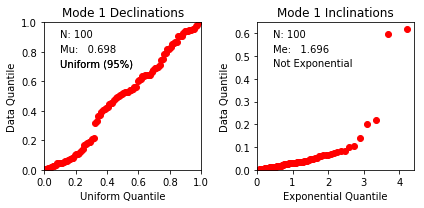

In [11]:
ipmag.fishqq(di_block=data) # use data read in problem 1a.

And, yeah, this one totally failed.  

Let's take a look at the data in Chapter_12/ps12-1c.di

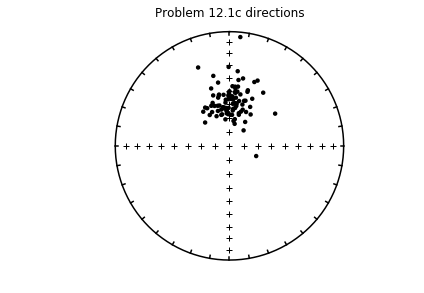

In [24]:
data=np.loadtxt('Chapter_12/ps12-1c.di')# read in data
ipmag.plot_net(1) # plot the equal area net
ipmag.plot_di(di_block=data,title="Problem 12.1c directions") # put on the directions


And now get the Fisher mean using **ipmag.fisher_mean**. 

In [27]:
ipmag.fisher_mean(di_block=data)

{'alpha95': 2.6103899751422732,
 'csd': 14.569590339383845,
 'dec': 1.7559454714356661,
 'inc': 58.092247788426981,
 'k': 30.908316904150979,
 'n': 98,
 'r': 94.861686118309052}

Now we rotate the data to the mean declination and inclination using **pmag.dodirot()**.  But first, a little help message would be great.

In [4]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



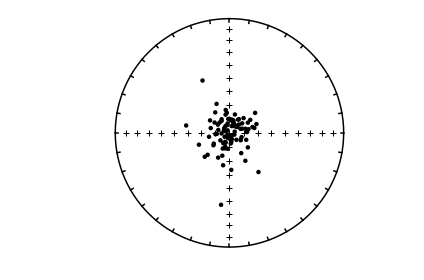

In [34]:
rotdata=pmag.dodirot_V(data,1.8,58)
ipmag.plot_net(1)
ipmag.plot_di(di_block=rotdata)

It looks like the inclinations are spread out too much.  Let's see what **ipmag.fishqq()** has to say.

{'Dec': 21.314210944431114,
 'Inc': 89.680667042164345,
 'Me': 1.4903370213439928,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.49087527258878233,
 'Mu_critical': 1.207,
 'N': 98,
 'Test_result': 'Fisherian model rejected'}

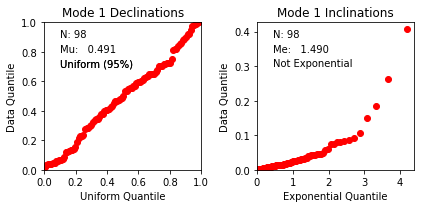

In [36]:
ipmag.fishqq(di_block=rotdata)

And sure enough...  the inclinations are too spread out.  They are not exponentially distributed.

## Problem 2

The best way to do a foldtest in a Jupyter Notebook is to use **ipmag.bootstrap_fold_test( )**:

 

In [38]:
help(ipmag.bootstrap_fold_test)

Help on function bootstrap_fold_test in module pmagpy.ipmag:

bootstrap_fold_test(Data, num_sims=1000, min_untilt=-10, max_untilt=120, bedding_error=0, save=False, save_folder='.', fmt='svg', ninety_nine=False)
    Conduct a bootstrap fold test (Tauxe and Watson, 1994)
    
    Three plots are generated: 1) equal area plot of uncorrected data;
    2) tilt-corrected equal area plot; 3) bootstrap results showing the trend
    of the largest eigenvalues for a selection of the pseudo-samples (red
    dashed lines), the cumulative distribution of the eigenvalue maximum (green
    line) and the confidence bounds that enclose 95% of the pseudo-sample
    maxima. If the confidence bounds enclose 100% unfolding, the data "pass"
    the fold test.
    
    Parameters
    ----------
    Data : a numpy array of directional data [dec, inc, dip_direction, dip]
    num_sims : number of bootstrap samples (default is 1000)
    min_untilt : minimum percent untilting applied to the data (default is -10%)

So we first have to read in the data and make sure it is in a suitable array, then call **ipmag.bootstrap_fold_test( )**.  

In [39]:
fold_data=np.loadtxt('Chapter_12/ps12-2.dat')
fold_data

array([[ 347.242   ,   52.2493  ,  -11.7771  ,   -2.      ],
       [   9.68049 ,   51.7727  ,  -11.7771  ,   -2.      ],
       [ 338.216   ,   46.0366  ,  -11.7771  ,   -2.      ],
       [ 358.397   ,   37.2573  ,   -6.1946  ,  -21.      ],
       [ 339.636   ,   42.4709  ,   -6.1946  ,  -21.      ],
       [ 334.918   ,   46.4638  ,   -6.1946  ,  -21.      ],
       [  13.7035  ,   41.6794  ,   -4.3937  ,  -29.      ],
       [ 331.639   ,   29.0275  ,   -4.3937  ,  -29.      ],
       [ 349.954   ,   47.9429  ,   -4.3937  ,  -29.      ],
       [ 342.736   ,   20.8759  ,    1.6775  ,  -47.      ],
       [   4.08913 ,   43.7593  ,    1.6775  ,  -47.      ],
       [ 359.68    ,   30.4149  ,    1.6775  ,  -47.      ],
       [ 346.004   ,   47.2846  ,    6.8026  ,   -9.      ],
       [ 342.047   ,   46.6271  ,    6.8026  ,   -9.      ],
       [ 347.862   ,   31.7526  ,    6.8026  ,   -9.      ],
       [   0.583997,   32.1065  ,    7.4077  ,    0.      ],
       [ 347.8     ,   3

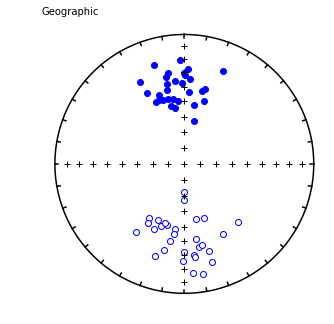

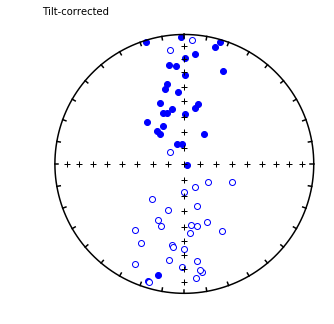

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
-3 - 19 percent unfolding
range of all bootstrap samples: 
-10  -  28 percent unfolding


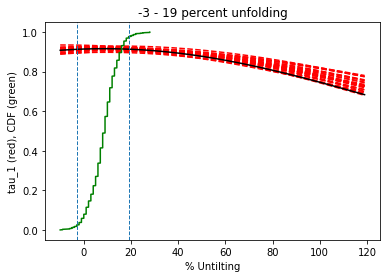

In [40]:
ipmag.bootstrap_fold_test(fold_data)

These data are much better grouped in geographic coordinates and much worse after tilt correction.  So these were magnetized after tilting.  

## Problem 3a

We know what to do here:  

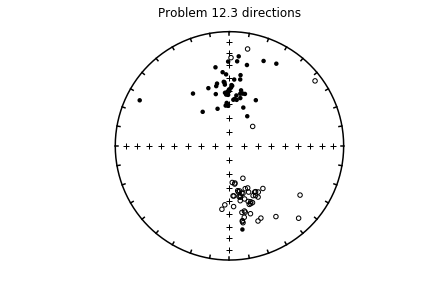

In [189]:
di_block=np.loadtxt('Chapter_12/ps12-3.dat')# read in data
ipmag.plot_net(1) # plot the equal area net
ipmag.plot_di(di_block=di_block,title="Problem 12.3 directions") # put on the directions


## Problem 3b

To separate by polarity, one could just sort by inclination and put all the negative ones in one group and all the positive ones in the other.  But this is dangerous for low inclination data (because you could easily have negative inclinations pointing north). A more general approach (which would allow southward directed declinations with positive inclinations, for example), would be to read the data into a Pandas DataFrame, calculate the principal direction of the entire dataset using **pmag.doprinc()** and calculate the directions rotated to that reference.  Then all positive inclinations would be one polarity (say, normal) and the other would all be the reverse polarity.  So, here goes.

In [190]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [191]:
# calculate the principle direction for the data set
principal=pmag.doprinc(di_block)
print ('Principal direction declination: ' + '%7.1f'%(principal['dec']))
print ('Principal direction inclination: ' + '%7.1f'%(principal['inc']))


Principal direction declination:   351.7
Principal direction inclination:    47.8


Now we can use some nice **Pandas** functionality to assign polarity:

In [192]:
import pandas as pd

In [193]:
# make a dataframe
df=pd.DataFrame(di_block)
df.columns=['dec','inc']
# make a column with the principal dec and inc
df['principal_dec'] = principal['dec'] # assign these to the dataframe
df['principal_inc'] = principal['inc']
# make a principal block for comparison
principal_block=df[['principal_dec','principal_inc']].values
# get the angle from each data point to the principal direction
df['angle'] = pmag.angle(di_block,principal_block) 
# assign polarity
df.loc[df.angle>90,'polarity'] = 'Reverse'
df.loc[df.angle<=90,'polarity'] = 'Normal'

Now that polarity is assigned using the angle from the principal component, let's filter the data by polarity and then put the data back into arrays for calculating stuff.

In [194]:
normal_data = df[df.polarity=='Normal'].reset_index(drop=True)
reverse_data = df[df.polarity=='Reverse'].reset_index(drop=True)
NormBlock=np.array([normal_data["dec"],normal_data["inc"]]).transpose()
RevBlock=np.array([reverse_data["dec"],reverse_data["inc"]]).transpose()
help(pmag.fisher_mean)

Help on function fisher_mean in module pmagpy.pmag:

fisher_mean(data)
    Calculates the Fisher mean and associated parameter from a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    fpars : dictionary containing the Fisher mean and statistics
        dec : mean declination
        inc : mean inclination
        r : resultant vector length
        n : number of data points
        k : Fisher k value
        csd : Fisher circular standard deviation
        alpha95 : Fisher circle of 95% confidence



In [195]:
norm_fpars= pmag.fisher_mean(NormBlock)
print ('Mean normal declination: ' + '%7.1f'%(norm_fpars['dec']))
print ('Mean normal inclination: ' + '%7.1f'%(norm_fpars['inc']))



Mean normal declination:     1.8
Mean normal inclination:    44.5


In [196]:
rev_fpars= pmag.fisher_mean(RevBlock)
print ('Mean reverse declination: ' + '%7.1f'%(rev_fpars['dec']))
print ('Mean reverse inclination: ' + '%7.1f'%(rev_fpars['inc']))



Mean reverse declination:   161.6
Mean reverse inclination:   -47.4


Now let's check if the data are Fisher distributed using our old friend **ipmag.fishqq( )**

({'Dec': 1.5293803485536492,
  'Inc': 46.482934309421196,
  'Me': 2.2333702102356003,
  'Me_critical': 1.094,
  'Mode': 'Mode 1',
  'Mu': 0.25998528559569234,
  'Mu_critical': 1.207,
  'N': 51,
  'Test_result': 'Fisherian model rejected'},
 {'Dec': 161.97680504147183,
  'Inc': -48.158470476844251,
  'Me': 2.4433648169892233,
  'Me_critical': 1.094,
  'Mode': 'Mode 2',
  'Mu': 0.3979769747040573,
  'Mu_critical': 1.207,
  'N': 49,
  'Test_result': 'Fisherian model rejected'})

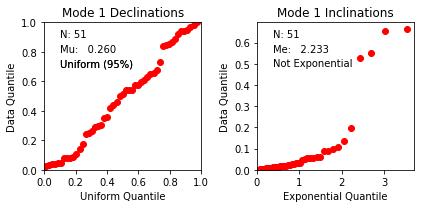

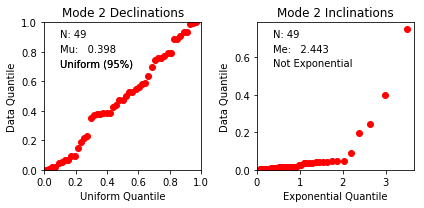

In [197]:
ipmag.fishqq(di_block=di_block)

The uniform null hypothesis fails at the 95\% confidence level for the normal data. So lets try **pmag.dobingham()** and **pmag.dokent( )**  for the whole dataset and the norm and reverse data, respectively.  Note that dokent has a different syntax.  

In [198]:
norm_kpars=pmag.dokent(NormBlock,len(NormBlock))
print (norm_kpars)

{'dec': 1.8418265788897581, 'inc': 44.53459571234896, 'n': 51, 'Zdec': 109.76515446803812, 'Zinc': 17.368878877663949, 'Edec': 215.16930092664603, 'Einc': 40.33889558271995, 'Zeta': 4.4470950354469121, 'Eta': 6.0695375475121098}


In [199]:
rev_kpars=pmag.dokent(RevBlock,len(RevBlock))
print (rev_kpars)

{'dec': 161.58420099308617, 'inc': -47.376687712807573, 'n': 49, 'Zdec': 251.39147985122787, 'Zinc': 0.17736004525925556, 'Edec': 161.22825810425002, 'Einc': 42.622761372712993, 'Zeta': 3.2684112985703253, 'Eta': 5.1265369325034573}


In [200]:
bpars=pmag.dobingham(di_block)
print (bpars)

{'dec': 351.68028068352561, 'inc': 47.835741385177819, 'Edec': 203.4314359127147, 'Einc': 37.59902866928423, 'Zdec': 100.4584130108465, 'Zinc': 16.252426124751437, 'n': 100, 'Zeta': 2.992552533232026, 'Eta': 3.6562212169246653}


And finally the bootstrapped means:  

In [201]:
help(pmag.di_boot)

Help on function di_boot in module pmagpy.pmag:

di_boot(DIs, nb=5000)
     returns bootstrap means  for Directional data
     Parameters
     _________________
     DIs : nested list of Dec,Inc pairs
     nb : number of bootstrap pseudosamples
    
     Returns
    -------
     BDIs:   nested list of bootstrapped mean Dec,Inc pairs



In [202]:
BnDIs=pmag.di_boot(NormBlock)
BrDIs=pmag.di_boot(RevBlock)
norm_boot_kpars=pmag.dokent(BnDIs,NN=1)
rev_boot_kpars=pmag.dokent(BrDIs,NN=1)


And now for the plots, starting with the Fisher confidence ellipses using **ipmag.plot_di_mean**.  


In [203]:
help(ipmag.plot_di_mean)

Help on function plot_di_mean in module pmagpy.ipmag:

plot_di_mean(dec, inc, a95, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination) with alpha_95 ellipse on
    an equal area plot.
    
    Before this function is called, a plot needs to be initialized with code
    that looks something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination of mean being plotted
    inc : inclination of mean being plotted
    a95 : a95 confidence ellipse of mean being plotted
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r').
    marker : the default is a circle. Other symbols can be chosen (e.g. 's').
    markersize : the default is 20. Other sizes can be chosen.
    label : the default is no label. Labels can be assi

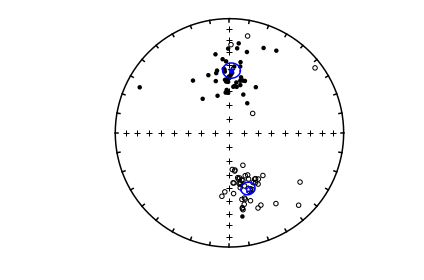

In [204]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
ipmag.plot_di_mean(dec=norm_fpars['dec'],inc=norm_fpars['inc'],a95=norm_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=rev_fpars['dec'],inc=rev_fpars['inc'],a95=rev_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


The other ellipses get plotted with a different function, **ipmag.plot_di_mean_ellipse**. 

In [205]:
help(ipmag.plot_di_mean_ellipse)

Help on function plot_di_mean_ellipse in module pmagpy.ipmag:

plot_di_mean_ellipse(dictionary, fignum=1, color='k', marker='o', markersize=20, label='', legend='no')
    Plot a mean direction (declination, inclination)  confidence ellipse.
    
    Parameters
    -----------
    dictionary : a dictionary generated by the pmag.dobingham or pmag.dokent funcitons



Bingham: 

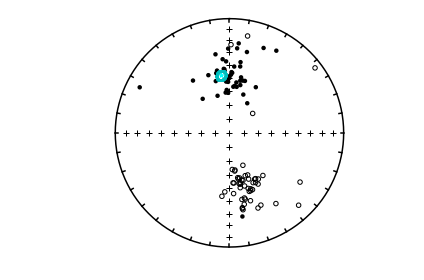

In [206]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
ipmag.plot_di_mean_ellipse(bpars,marker='*',color='cyan',markersize=20)

Kent:

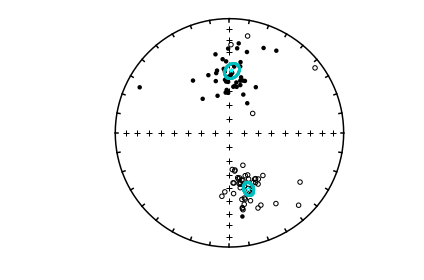

In [207]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
ipmag.plot_di_mean_ellipse(norm_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(rev_kpars,marker='*',color='cyan',markersize=20)

And bootstrapped

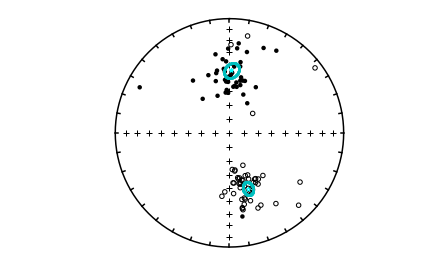

In [208]:

ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
ipmag.plot_di_mean_ellipse(norm_boot_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(rev_boot_kpars,marker='*',color='cyan',markersize=20)

The Kent ellipses do a pretty good job - as well as the bootstrapped ones.

## Problem 3c

For this problem, we have to flip the reverse mode to the antipodes and then try the Watson's V test.  



In [209]:
help(pmag.flip)

Help on function flip in module pmagpy.pmag:

flip(di_block, combine=False)
    determines principle direction and calculates the antipode of
    the reverse mode
    Parameters
    ___________
    di_block : nested list of directions
    Return
    D1 : normal mode
    D2 : flipped reverse mode as two DI blocks
    combine : if True return combined D1, D2, nested D,I pairs



In [210]:
norms,rev_antis=pmag.flip(di_block)


In [211]:
help(ipmag.common_mean_watson)

Help on function common_mean_watson in module pmagpy.ipmag:

common_mean_watson(Data1, Data2, NumSims=5000, print_result=True, plot='no', save=False, save_folder='.', fmt='svg')
    Conduct a Watson V test for a common mean on two directional data sets.
    
    This function calculates Watson's V statistic from input files through
    Monte Carlo simulation in order to test whether two populations of
    directional data could have been drawn from a common mean. The critical
    angle between the two sample mean directions and the corresponding
    McFadden and McElhinny (1990) classification is printed.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of Monte Carlo simulations (default is 5000)
    print_result : default is to print the test result (True)
    plot : the default is no plot ('no'). Putting 'yes' will the plot the CDF
        

Results of Watson V test: 

Watson's V:           22.6
Critical value of V:  6.1
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 14.3
Critical angle for M&M1990:   7.5



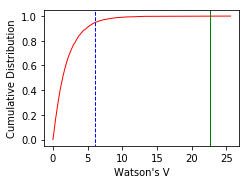

(0, 14.324009484018529, 7.4524985796186245)

In [214]:
ipmag.common_mean_watson(norms,rev_antis,plot='yes')

Accoding to Dr. Watson, these two modes are not drawn from the same distribution (according to watson's Vw criterion), so they fail the reversals test.   Now let's try the function **ipmag.reversal_test_bootstrap** instead.  

In [215]:
help(ipmag.reversal_test_bootstrap)

Help on function reversal_test_bootstrap in module pmagpy.ipmag:

reversal_test_bootstrap(dec=None, inc=None, di_block=None, plot_stereo=False, save=False, save_folder='.', fmt='svg')
    Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
    determine whether two populations of directions could be from an antipodal
    common mean.
    
    Parameters
    ----------
    dec: list of declinations
    inc: list of inclinations
        or
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')
    
    Returns
    -------
    plots : Plots of the cumulative d

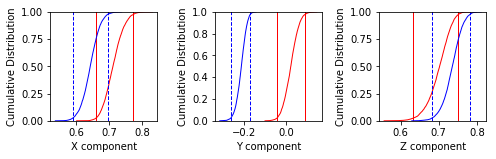

In [216]:
ipmag.reversal_test_bootstrap(di_block=di_block)

The Y components are significantly different in the reverse mode (after flipping) with respect to the normal mode.  Therefore, this data set fails the reversals test.  And you should definately NOT use Bingham statistics on this data set! 